# PAP2 V255: Röntgenspektrometer

In [1]:
#Importieren von allen benötigten Modulen

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import io #Für ersetzen der Komma durch Punkte
from scipy.stats import chi2 #Für Fitgüte

Aufgabe 1:


a) Extrapolieren sie den einigermaßen geraden Anstieg am kurzwelligen Ende bis zum Untergrund. Versehen Sie die betreffenden Punkte mit statisti- schen Fehlern. Bestimmen Sie so die Grenzwellenla ̈nge des Bremsspek- trums von 35 kV und daraus die Plank’sche Konstante h. Berechnen Sie aus der Stelle des Beginns des Spektrums, ab welchen Winkel das Spek- trum zweiter Ordnung einsetzt.

b) Tragen Sie die Za ̈hlrate als Funktion des Winkels β fu ̈r die vier Linien auf und bestimmen sie die Wellenla ̈nge von Kα und Kβ aus den Messungen in beiden Ordnungen. Bestimmen Sie fu ̈r Kα in erster Ordnung die Halb- wertsbreite (Breite der Linie in halber Ho ̈he).
Dichte Molekulargewicht Netzebenenabstand

c) Bestimmen Sie durch Extrapolation die Einsatzspannung, d.h. die Span- nung, oberhalb der es Quanten gibt, deren Wellenla ̈nge zu β = 7,5◦ geho ̈rt. Berechnen Sie aus diesem Wert wieder h. Theoretisch ist diese sog. Iso- chromatenmethode, die hier zur h Bestimmung benutzt wird, der Extrapo- lation des kurzwelligen Endes des Spektrums in Aufgabe 2a) a ̈quivalent. Die Spektrumsextrapolation ist aber in der Praxis ungenauer, da dort Messpunkte unterschiedlicher Wellenla ̈nge benutzt werden, die individuell z.B. auf Eigenabsorption in der Anode, dem Ro ̈hrenfenster usw. sowie auf das unterschiedliche Reflexionsvermo ̈gen des Kristalls korrigiert werden mu ̈ssten.

Aufgabe 2: 


Ermitteln Sie aus dem Spektrum die Lage der Kα und Kβ-Linien und berechnen Sie mit den in 1b) gewonnenen Wellenla ̈ngen fu ̈r Kα und Kβ die Gitterkonstante von NaCl sowie die Avogadro Zahl.



(3, 22, 0, 3000)

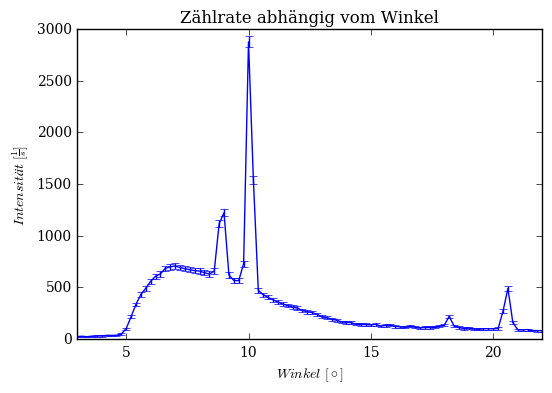

In [4]:
#Einlesen der Daten aus LiF.txt für LiF Kristall mit Fehler
daten = open('LiF.txt').read().replace(',','.')
angle, intensity = np.loadtxt(io.StringIO(daten), unpack=True)
#print (angle, intensity)
dintensity=np.sqrt(intensity)

plt.rcParams["font.family"]='serif'
plt.errorbar(angle, intensity, yerr=dintensity)
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Zählrate abhängig vom Winkel')
plt.axis((3, 22, 0, 3000))

Untergrund= 22.7 ± 2.16333332426
Fitgerade = b + c * x
b= -2676.23999569 ± 9738.69153828
c= 555.799999187 ± 346.080008629
chisq= 0.449685478994
chisq_red= 0.224842739497
Fitwahrscheinlichkeit= 80.0 %


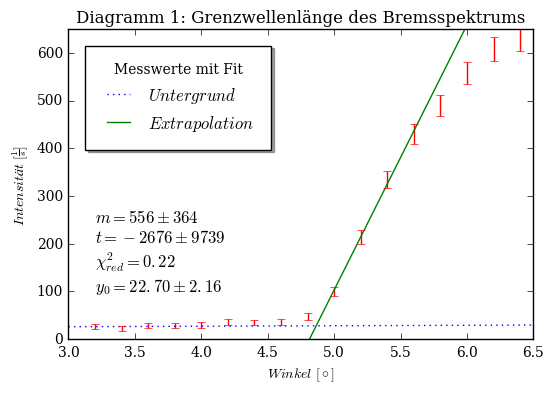

In [7]:
#Aufgabe 1a: Extrapolieren

ang1=angle[1:5]
int1=intensity[1:5]

ang2=angle[10:14]
int2=intensity[10:14]
dint2=dintensity[10:14]

def linear1(x,a):
    return a+x
popt, pcov = curve_fit(linear1, ang1, int1, p0=[1])
perr=np.sqrt(diag(pcov))

def linear2(x,b,c):
    return b+c*x
popt2,pcov2=curve_fit(linear2, ang2, int2)

x=np.linspace(3,7,20)
y=np.linspace(4.7,6,20)

plt.plot(x,linear1(x,*popt),label="$Untergrund$",linestyle=':')
plt.plot(y,linear2(y,*popt2), label="$Extrapolation$")
plt.errorbar(angle[1:20], intensity[1:20],dintensity[1:20], linestyle='None')
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 1: Grenzwellenlänge des Bremsspektrums')
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='upper left', shadow='true')
plt.axis((3, 6.5, 0, 650))

print('Untergrund=',popt[0],'±',pcov[0][0])
print('Fitgerade = b + c * x')
print('b=',popt2[0],'±',pcov2[0][0])
print('c=',popt2[1],'±',pcov2[1][1])

chisq=np.sum((linear2(ang2,*popt2)-int2)**2/dint2**2)
dof=2
chisq_red=chisq/dof
print('chisq=',chisq)
print('chisq_red=',chisq_red)

prob=round(1-chi2.cdf(chisq,dof),2)*100
print('Fitwahrscheinlichkeit=',prob,'%')
plt.text(3.2,100,"$m=556\pm364$\n$t=-2676\pm9739$\n$\chi_{red}^{2}=0.22$\n$y_{0}=22.70\pm2.16$", fontsize=12)
#plt.savefig('v255_1.pdf',format='pdf')

[  47.91398186    8.91089304    0.23183088  120.25861864]
[ 145.21412399   10.04793816    0.22213806  101.23309313]


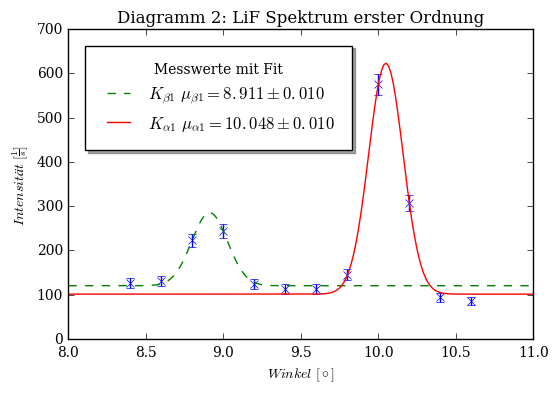

In [10]:
#Aufgabe 2b: Spektrum erster Ordnung von LiF
#Zählrate als Funktion des Winkels, bestimmen der Wellenlängen von Ka und Kb

#Fitfunktion für Peaks
def gauss(x, A, mu, sig,U):
    return U+(A/(sig*np.sqrt(np.pi/2)))*np.exp(-2*((x-mu)/sig)**2)

#Auswählen des Spektrums erster Ordnung
ang3=angle[27:39]
int3=intensity[27:39]
dint3=dintensity[27:39]

#Gausskurven an die Peaks fitten
poptb1, pcovb1=curve_fit(gauss,ang3[0:6], int3[0:6], p0=[47,9,0.2,120], sigma=dint3[0:6])
popta1, pcova1=curve_fit(gauss,ang3[6:11], int3[6:11], p0=[145,10,0.2,100], sigma=dint3[6:11])
x3=np.linspace(8,11,200)

#Plotten der Punkte und des Fits
plt.errorbar(ang3, int3,yerr=dint3, linestyle='none', marker='x')
plt.plot(x3, gauss(x3, *poptb1), linestyle='--', label='$K_{\\beta1}\ \\mu_{\\beta1}=%.3f\pm%.3f$' %(poptb1[1], np.sqrt(pcovb1[1][1]))) 
plt.plot(x3, gauss(x3, *popta1), label='$K_{\\alpha1}\ \\mu_{\\alpha1}=%.3f\pm%.3f$' %(popta1[1], np.sqrt(pcova1[1][1])))
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 2: LiF Spektrum erster Ordnung')
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='best', shadow='true')
#plt.axis((3, 6.2, 0, 600))

#\chi_{red}^{2}=%.2f\pm%.2f
print (poptb1)
print (popta1)

#plt.savefig('v255_2.pdf',format='pdf')

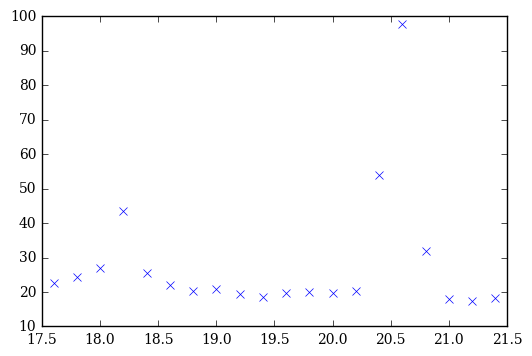

In [5]:
#Auswählen des Spektrums zweiter Ordnung
ang4=angle[73:93]
int4=intensity[73:93]
dint4=dintensity[73:93]
plt.plot(ang4, int4, linestyle='none', marker='x')
#x2=np.linspace(9.7,10.5,100)



/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  5.94483106  18.1882669    0.21896382  22.06161107]
[ 26.0008484   20.56216646   0.24966981  18.39393545]


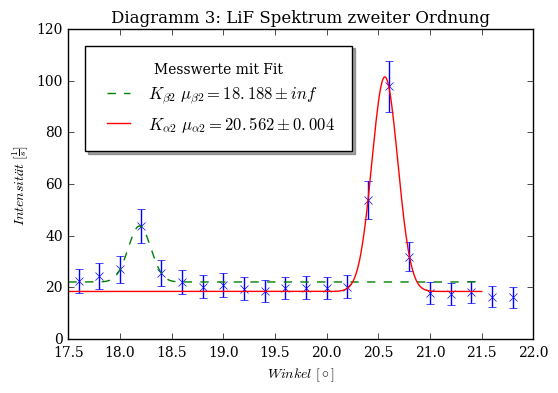

In [12]:
#Auswählen des Spektrums zweiter Ordnung
ang4=angle[73:95]
int4=intensity[73:95]
dint4=dintensity[73:95]

#Gausskurven an die Peaks fitten
poptb2, pcovb2=curve_fit(gauss,ang4[2:6], int4[2:6],p0=[6,18,0.2,22], sigma=dint4[2:6], maxfev=5000)
popta2, pcova2=curve_fit(gauss,ang4[12:19], int4[12:19], p0=[25,20,0.25,18], sigma=dint4[12:19], maxfev=5000)
x4=np.linspace(17.5,21.5,400)

#Plotten der Punkte und des Fits
plt.errorbar(ang4, int4,yerr=dint4, linestyle='none', marker='x')
plt.plot(x4, gauss(x4, *poptb2), linestyle='--', label='$K_{\\beta2}\ \\mu_{\\beta2}=%.3f \pm %.3f$' %(poptb2[1], np.sqrt(pcovb2[1][1]))) 
plt.plot(x4, gauss(x4, *popta2), label='$K_{\\alpha2}\ \\mu_{\\alpha2}=%.3f \pm %.3f$' %(popta2[1], np.sqrt(pcova2[1][1])))
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 3: LiF Spektrum zweiter Ordnung')
#plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='best', shadow='true')

print(poptb2)
print(popta2)

#plt.savefig('v255_3.pdf',format='pdf')

In [ ]:
print('Fitfunktion=U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)')
print('A1=',popt1[0],'±',pcov1[0][0])
print('mu1=',popt1[1],'±',pcov1[1][1])
print('sig1=',popt1[2],'±',pcov1[2][2])
print('U1=',popt1[3],'±',pcov1[3][3])
print('A2=',popt2[0],'±',pcov2[0][0])
print('mu2=',popt2[1],'±',pcov2[1][1])
print('sig2=',popt2[2],'±',pcov2[2][2])
print('U2=',popt2[3],'±',pcov2[3][3])

chisq1=np.sum((gauss1(W1[1:9],*popt1)-I1[1:9])**2/fehler_I1[1:9]**2)
dof1=9
chisq1_red=chisq1/dof1
print('chisq1=',chisq1)
print('chisq1_red=',chisq1_red)
from scipy.stats import chi2
prob1=round(1-chi2.cdf(chisq1,dof1),2)*100
print('Fitwahrscheinlichkeit1=',prob1,'%')

chisq2=np.sum((gauss2(W1[12:21],*popt2)-I1[12:21])**2/fehler_I1[12:21]**2)
dof2=5
chisq2_red=chisq2/dof2
print('chisq2=',chisq2)
print('chisq2_red=',chisq2_red)
prob2=round(1-chi2.cdf(chisq2,dof2),2)*100
print('Fitwahrscheinlichkeit2=',prob2,'%')

print('A3=',popt3[0],'±',pcov3[0][0])
print('mu3=',popt3[1],'±',pcov3[1][1])
print('sig3=',popt3[2],'±',pcov3[2][2])
print('U3=',popt3[3],'±',pcov3[3][3])
print('A4=',popt4[0],'±',pcov4[0][0])
print('mu4=',popt4[1],'±',pcov4[1][1])
print('sig4=',popt4[2],'±',pcov4[2][2])
print('U4=',popt4[3],'±',pcov4[3][3])

chisq3=np.sum((gauss3(W2[1:8],*popt3)-I2[1:8])**2/fehler_I2[1:8]**2)
dof3=16
chisq3_red=chisq3/dof3
print('chisq3=',chisq3)
print('chisq3_red=',chisq3_red)
prob3=round(1-chi2.cdf(chisq3,dof3),2)*100
print('Fitwahrscheinlichkeit3=',prob3,'%')

chisq4=np.sum((gauss4(W2[12:21],*popt4)-I2[12:21])**2/fehler_I2[12:21]**2)
dof4=18
chisq4_red=chisq4/dof4
print('chisq4=',chisq4)
print('chisq4_red=',chisq4_red)
prob4=round(1-chi2.cdf(chisq4,dof4),2)*100
print('Fitwahrscheinlichkeit4=',prob4,'%')

Fitgerade=t+m*x
t= -1241.83692262 ± 1159.86111425
m= 55.5816808041 ± 1.54188933688
chisq= 7.57806513013
chisq_red= 0.68891501183
Fitwahrscheinlichkeit= 75.0 %


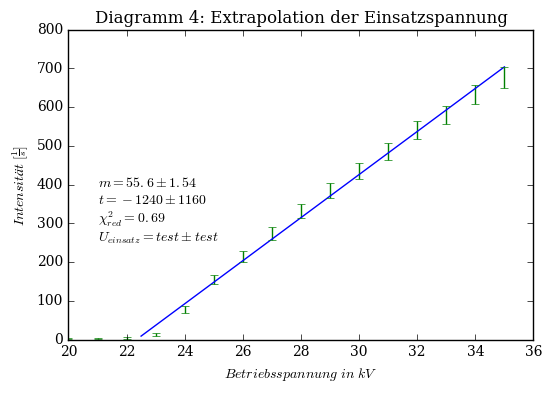

In [19]:
#Aufgabe 1c: Einsatzspannung

#Daten einlesen
U, R = np.loadtxt('tab1.txt', skiprows=1, usecols=(0, 1), unpack=True)
dR=np.sqrt(R)

#Lineare Fitfunktion
def linear(x,t,m):
    return t+m*x

#Fit durchführen
x=np.linspace(22.5,35,100)
popt,pcov=curve_fit(linear,U[4:16],R[4:16],sigma=dR[4:16:1])

print('Fitgerade=t+m*x')
print('t=',popt[0],'±',pcov[0][0])
print('m=',popt[1],'±',pcov[1][1])

#Güte des Fits ermitteln
chisq=np.sum((linear(U[4:16],*popt)-R[4:16])**2/dR[4:16]**2)
dof=11
chisq_red=chisq/dof
print('chisq=',chisq)
print('chisq_red=',chisq_red)
prob=round(1-chi2.cdf(chisq,dof),2)*100
print('Fitwahrscheinlichkeit=',prob,'%')


plt.text(21,250,"$m=55.6\pm1.54$\n$t=-1240\pm1160$\n$\chi_{red}^{2}=0.69$\n$U_{einsatz}=test \pm test$")

plt.plot(x,linear(x,*popt))
plt.errorbar(U,R,dR,linestyle='None')
plt.xlabel('$Betriebsspannung\ in\ kV$') 
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 4: Extrapolation der Einsatzspannung')

plt.savefig('v255_4.pdf',format='pdf')